<h2> Importando bibliotecas

In [522]:
#https://medium.com/analytics-vidhya/how-to-summarize-data-with-pandas-2c9edffafbaf
#https://www.programcreek.com/python/example/96216/seaborn.set_context
#https://towardsdev.com/outlier-detection-using-iqr-method-and-box-plot-in-python-82e1e15232bd

import requests as rq
import pandas as pd

pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

from io import BytesIO
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

C:\Users\kairo\AppData\Local\Temp\ipykernel_2496\1000525569.py:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)  # or 199


<h2> Importando o dataframe do arquivo principal

In [523]:
df_header = pd.read_pickle('Principal.pkl')

<h2> Importando o arquivo dos itens em dataframe

In [524]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Itens/Api_Itens.xlsx?raw=true"
data = rq.get(url).content
df_itens = pd.read_excel(BytesIO(data))

In [525]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Cadastro%20Fam%C3%ADlias%20Petronect/FamiliasGeral.xlsx?raw=true"
data = rq.get(url).content
df_familias = pd.read_excel(BytesIO(data))
df_familias.drop(['Tipo da Família','Família'],axis=1,inplace=True)

In [526]:
display(f'itens {df_itens.shape}')
df_itens.info()
df_itens.drop(['Unnamed: 0','EXLIN','YPCOMT_LINE','ATTACHMENTS','SRC_GUID'], axis=1,inplace=True)

'itens (37381, 18)'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37381 entries, 0 to 37380
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        37381 non-null  int64  
 1   SRC_GUID          37381 non-null  object 
 2   NUMBER_INT        37381 non-null  object 
 3   DESCRIPTION_UC    37364 non-null  object 
 4   ORDERED_PROD      28601 non-null  object 
 5   YPFAMITEM         32303 non-null  float64
 6   QUANTITY          37381 non-null  float64
 7   UNIT              36387 non-null  object 
 8   UNIT_TEXT         35098 non-null  object 
 9   DELIV_DATE        37381 non-null  object 
 10  EXLIN             37381 non-null  object 
 11  GROUPING_LEVEL    5083 non-null   object 
 12  ITEM_PROCESS_TYP  37361 non-null  object 
 13  YPCOMT_LINE       37381 non-null  object 
 14  ATTACHMENTS       37381 non-null  object 
 15  LOTE              988 non-null    object 
 16  TOTAL             4095 non-null   object

In [527]:
df = df_header.merge(df_itens, on='OPPORT_NUM')
df = df.merge(df_familias, on='YPFAMITEM')

In [528]:
url = "https://github.com/kairobeduti/DadosShift/blob/master/Hist%C3%B3rico/Historico_QUOTS.xlsx?raw=true"
data = rq.get(url).content
df_quots = pd.read_excel(BytesIO(data))
df_quots.drop(['Unnamed: 0','DESCRIPTION'],axis=1,inplace=True)

In [529]:
df_quots.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302953 entries, 0 to 302952
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   NUMBER_INT       302953 non-null  object 
 1   OPPORT_NUM       302953 non-null  int64  
 2   TAXNUM           302952 non-null  object 
 3   SUPPLIER_NAME    302945 non-null  object 
 4   MEPP             79214 non-null   object 
 5   QUANTITY         302953 non-null  float64
 6   UNIT_VALUE       124595 non-null  object 
 7   TOTAL_VALUE      291479 non-null  object 
 8   CREATED_AT_DATE  302953 non-null  object 
 9   CREATED_AT_TIME  302953 non-null  object 
 10  CHARACTERISTIC   302953 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 25.4+ MB


In [530]:
df_quots = df_quots.query('TOTAL_VALUE != "Decline"')

Text(0.5, 1.0, 'Valores Faltantes')

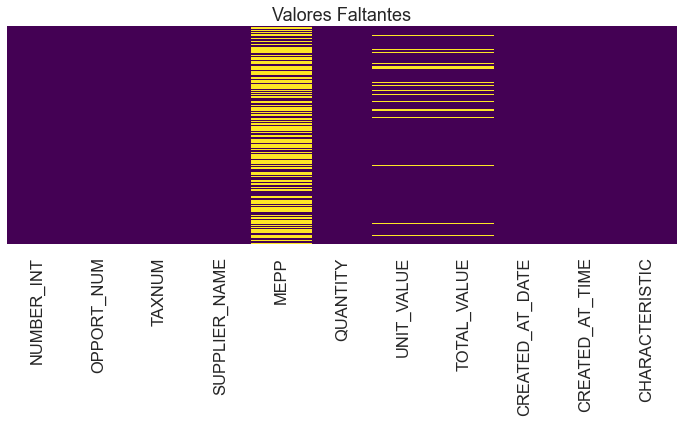

In [531]:
plt.figure(figsize=(12,4))
sns.heatmap(df_quots.isnull(),cbar=False,cmap='viridis',yticklabels=False)
plt.title('Valores Faltantes')

In [532]:
df = df.merge(df_quots, on=['OPPORT_NUM','NUMBER_INT'])

In [533]:
df['UNIT_VALUE'] = df['UNIT_VALUE'].fillna(0)
df['TOTAL_VALUE'] = df['TOTAL_VALUE'].fillna(0)

In [534]:
for x,t in enumerate(df.columns.to_list()):
    if t.__contains__('x') or t.__contains__('y') :
        print(t)
set(df['QUANTITY_x'] == df['QUANTITY_y'])
df_diff_qtd = df[df['QUANTITY_x'] != df['QUANTITY_y']]
df_diff_qtd.to_excel('zinabre.xlsx')

MEPP_x
QUANTITY_x
MEPP_y
QUANTITY_y


In [535]:
df_colunas_obj = df.loc[:, df.dtypes == object]
cols_object = df_colunas_obj.describe().T
cols_object = cols_object.reset_index()
cols_object['dist_uniques'] = (cols_object['unique'] / cols_object['count'])*100
cols_object = cols_object[cols_object['dist_uniques']<80]
lista_objects = cols_object['index'].to_list()
print(lista_objects)

['STATUS', 'OPPORT_TYPE', 'DM_CARACTERISTICA', 'DM_DESC_CURTA', 'DESCRIPTION', 'TZONE', 'CURRENCY', 'YPCON_MODALITY_NAME', 'MEPP_x', 'DISPUTE_MODE', 'OPPORT_TYPE_JULGAMENTO', 'NUMBER_INT', 'DESCRIPTION_UC', 'ORDERED_PROD', 'UNIT', 'UNIT_TEXT', 'DELIV_DATE', 'GROUPING_LEVEL', 'ITEM_PROCESS_TYP', 'LOTE', 'TOTAL', 'Grupo', 'NewFamília', 'Segmento', 'Escopo', 'Tipo', 'TAXNUM', 'SUPPLIER_NAME', 'MEPP_y', 'UNIT_VALUE', 'CREATED_AT_DATE', 'CREATED_AT_TIME', 'CHARACTERISTIC']


In [536]:
df_familias = df[['ITEM_PROCESS_TYP','Grupo','NewFamília','OPPORT_NUM','Segmento','Escopo','Tipo','DURACAO']]
df_familias.drop_duplicates(inplace=True)
lista_objects_familias = ['ITEM_PROCESS_TYP', 'Segmento', 'Tipo']

C:\Users\kairo\AppData\Local\Temp\ipykernel_2496\1922611593.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_familias.drop_duplicates(inplace=True)


In [538]:
sns.set_style("ticks")
sns.set_context("talk")
sns.set_style("darkgrid")

3


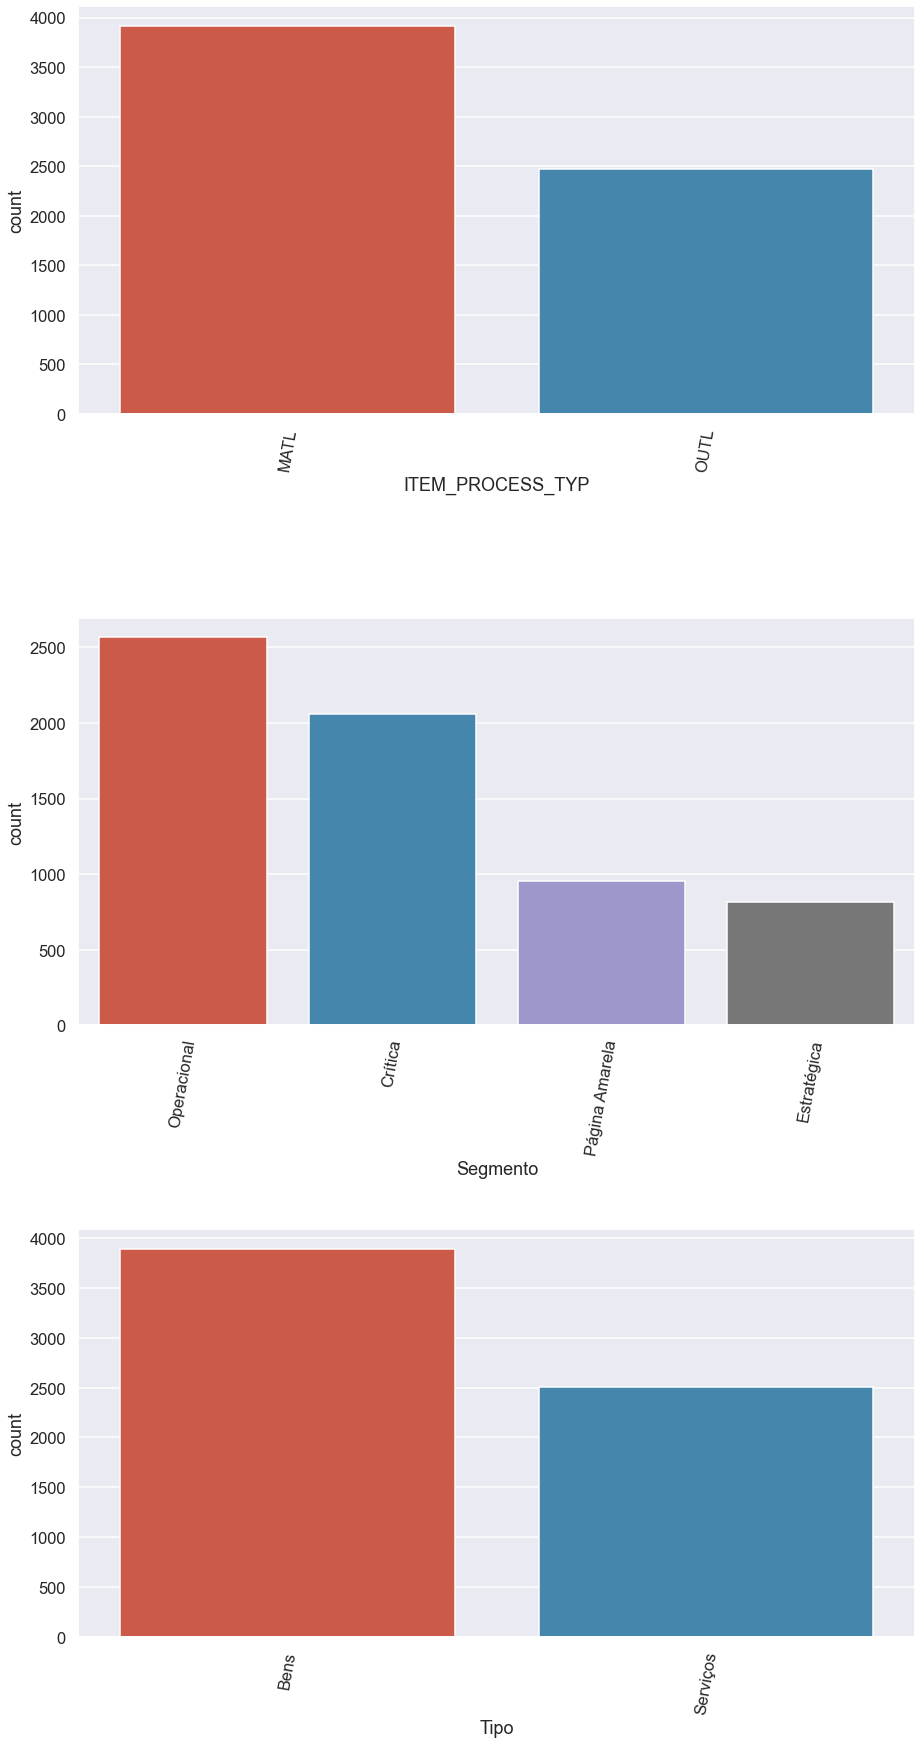

In [539]:
qtdplots = len(lista_objects_familias)
print(qtdplots)
f, ax = plt.subplots(qtdplots,1,figsize=(15,qtdplots*10))
# Adjust the subplot layout parameters
f.subplots_adjust(hspace=0.5, wspace=0.225)
for idx,plts in enumerate(lista_objects_familias):
  ax[idx]=sns.countplot(ax=ax[idx],x=plts, data=df_familias, order=df_familias[plts].value_counts().index)
  ax[idx].tick_params(axis='x', rotation=80)

3


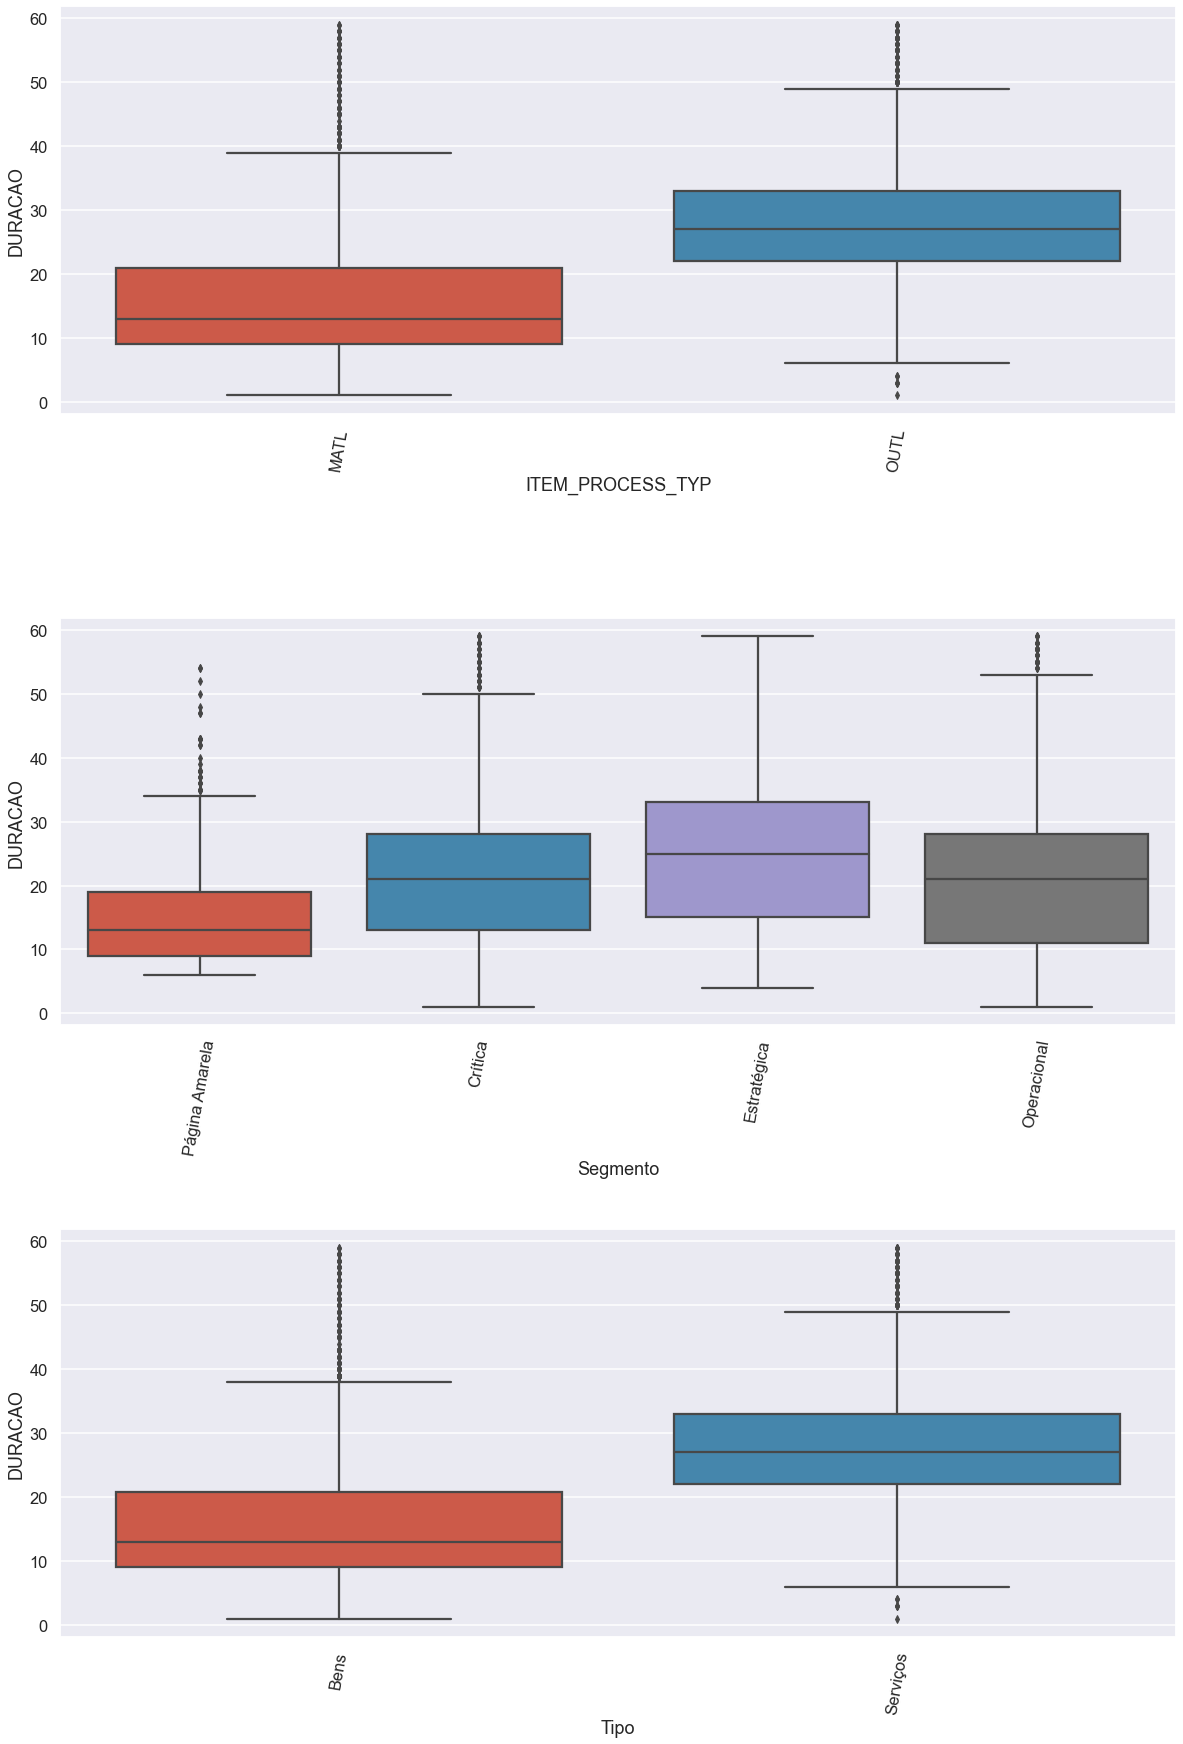

In [540]:
qtdplots = len(lista_objects_familias)
print(qtdplots)
f, ax = plt.subplots(qtdplots,1,figsize=(20,qtdplots*10))
# Adjust the subplot layout parameters
f.subplots_adjust(hspace=0.5, wspace=0.225)
for idx,plts in enumerate(lista_objects_familias):
  ax[idx]=sns.boxplot(ax=ax[idx],x=plts, y='DURACAO', data=df_familias[df_familias['DURACAO']<60])
  ax[idx].tick_params(axis='x', rotation=80)

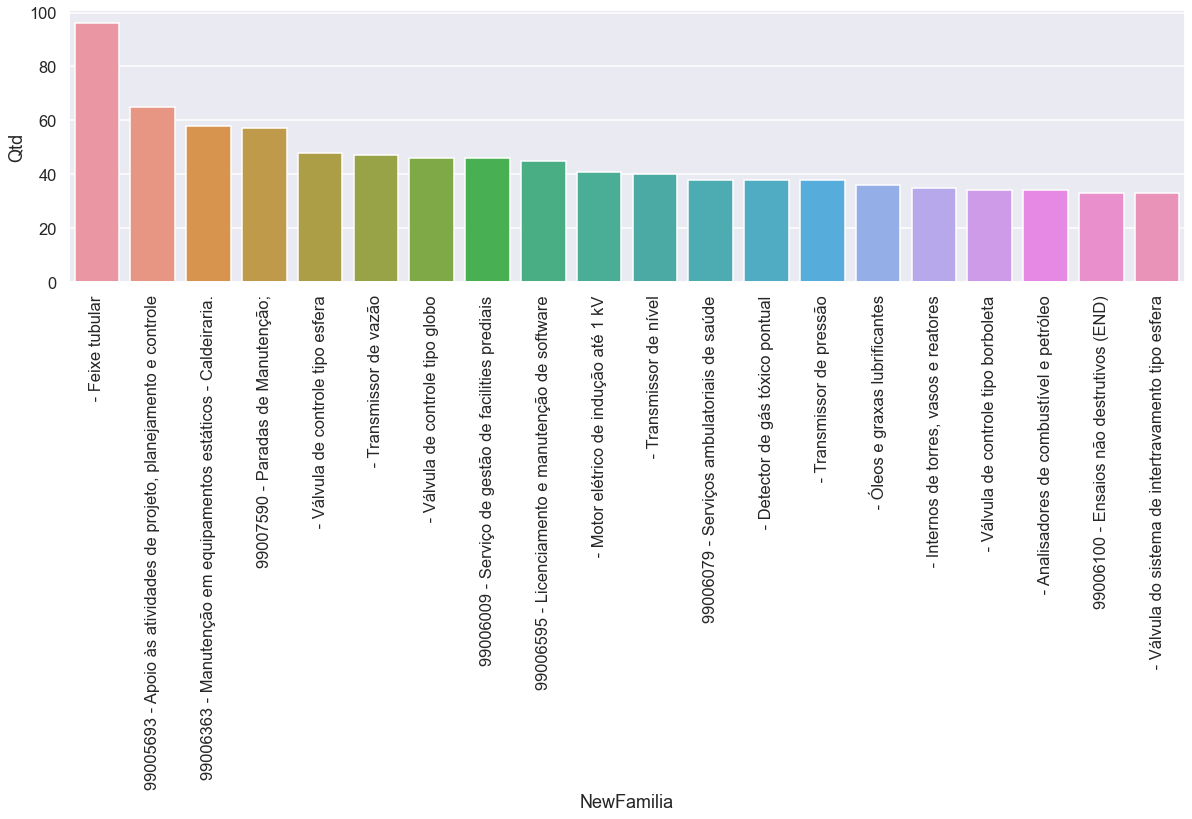

In [541]:
df_new_familia = df_familias['NewFamília'].value_counts().to_frame()[:20].reset_index()
df_new_familia.set_axis(['NewFamilia','Qtd'], axis=1, inplace=True)
f, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='NewFamilia', y='Qtd', data=df_new_familia)
ax.tick_params(axis='x', rotation=90)

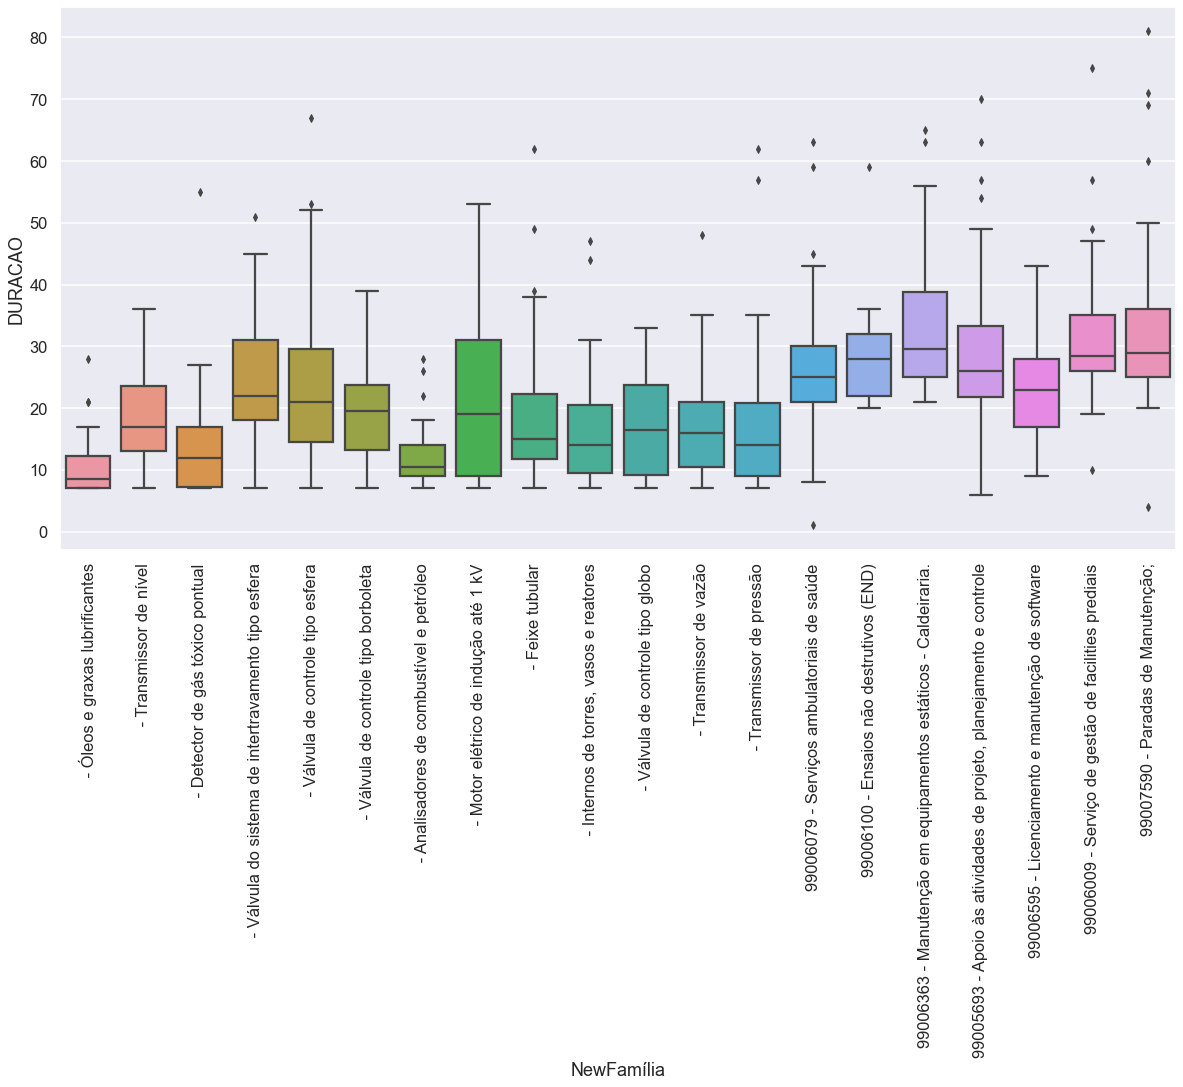

In [542]:
lst = list(df_new_familia['NewFamilia'].unique())
df_newfam_dur = df_familias[['NewFamília','DURACAO']].reset_index()
df_newfam_dur = df_newfam_dur[df_newfam_dur['NewFamília'].isin(lst)]

f, ax = plt.subplots(figsize=(20,10))
sns.boxplot(x='NewFamília', y='DURACAO', data=df_newfam_dur[df_newfam_dur['DURACAO']<100])
ax.tick_params(axis='x', rotation=90)

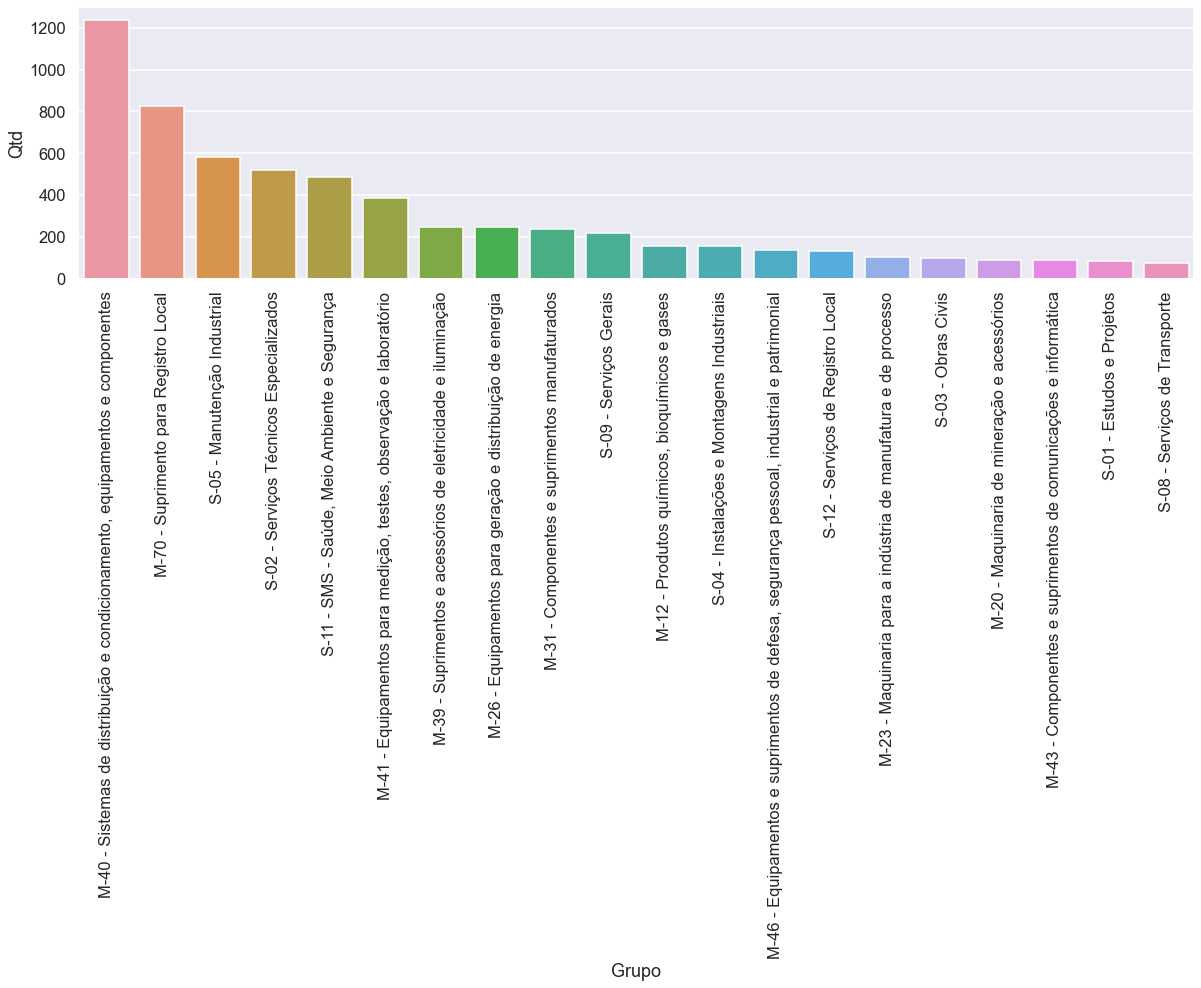

In [543]:
df_grupo = df_familias['Grupo'].value_counts().to_frame()[:20].reset_index()
df_grupo.set_axis(['Grupo','Qtd'], axis=1, inplace=True)
f, ax = plt.subplots(figsize=(20,5))
sns.barplot(x='Grupo', y='Qtd', data=df_grupo)
ax.tick_params(axis='x', rotation=90)

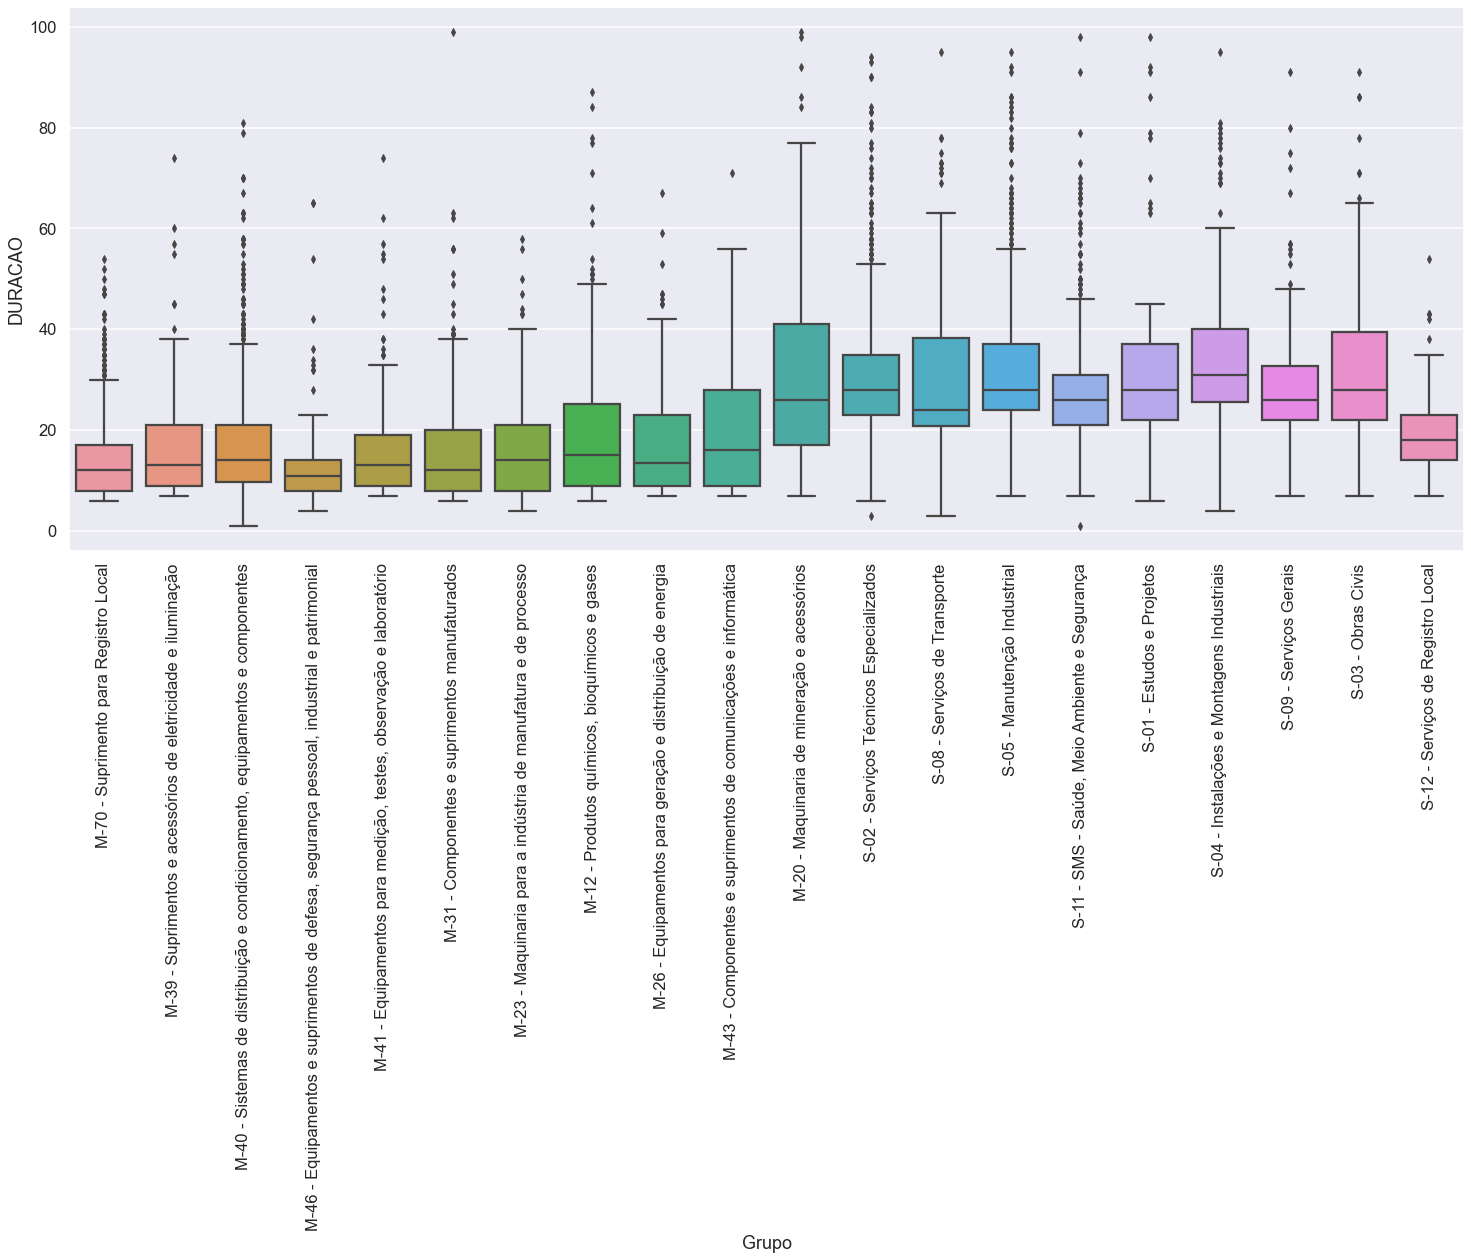

In [544]:
lst_grupo = list(df_grupo['Grupo'].unique())
df_grupo_dur = df_familias[['Grupo','DURACAO']].reset_index()
df_grupo_dur = df_grupo_dur[df_grupo_dur['Grupo'].isin(lst_grupo)]
f, ax = plt.subplots(figsize=(25,10))
sns.boxplot(x='Grupo', y='DURACAO', data=df_grupo_dur[df_grupo_dur['DURACAO']<100])
ax.tick_params(axis='x', rotation=90)

In [545]:
df_supplier = df[['TAXNUM', 'SUPPLIER_NAME','OPPORT_NUM']].copy()
df_supplier.drop_duplicates(inplace=True)
df_supp_norm = df_supplier['SUPPLIER_NAME'].value_counts().to_frame()
df_supp_norm.reset_index(inplace=True)
df_supp_norm.set_axis(['SUPPLIER_NAME','PER_PARTICIPA'],axis=1,inplace=True)
df_supp_norm.sort_values('PER_PARTICIPA', ascending=False)

,SUPPLIER_NAME,PER_PARTICIPA
0,BR COMPRESSORES SERVICE LTDA,693
1,ARCAM DO BRASIL COMERCIO DE EQUIPAMENTOS E SUPRIMENTOS LTDA,424
2,"IMPAKTUS ENGENHARIA, CONSULTORIA E EMPREENDIMENTOS LTDA",295
3,"DIAMETRAL REPRESENTACOES, COMERCIO E SERVICOS LTDA - ME",275
4,ELFE OPERACAO E MANUTENCAO S.A.,271
...,...,...
4220,LIMA SOUZA SOCIEDADE INDIVIDUAL DE ADVOCACIA,1
4219,NOLASCO SOCIEDADE DE ADVOGADOS,1
4218,"TRATLUB TRANSPORTE, PURIFICACAO E COMERCIO DE OLEO MINERAL LTDA - EPP",1
4217,AZI ANDRADE FACO ADVOGADOS,1


In [546]:
df['UNIT_VALUE_tmp'] = df['UNIT_VALUE'].str.replace('.','').str.strip()
df['UNIT_VALUE'] = df['UNIT_VALUE_tmp'].str.replace(',','.').astype('float')
df.drop('UNIT_VALUE_tmp', axis=1,inplace=True)

C:\Users\kairo\AppData\Local\Temp\ipykernel_2496\1534235725.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['UNIT_VALUE_tmp'] = df['UNIT_VALUE'].str.replace('.','').str.strip()


In [547]:
df['TOTAL_VALUE_tmp'] = df['TOTAL_VALUE'].str.replace('.','').str.strip()
df['TOTAL_VALUE'] = df['TOTAL_VALUE_tmp'].str.replace(',','.').astype('float')
df.drop('TOTAL_VALUE_tmp', axis=1,inplace=True)

C:\Users\kairo\AppData\Local\Temp\ipykernel_2496\1323756818.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['TOTAL_VALUE_tmp'] = df['TOTAL_VALUE'].str.replace('.','').str.strip()


In [548]:
df['Chave'] = df['OPPORT_NUM'].astype('str') + '--'  + df['NUMBER_INT']

In [549]:
def calc_upper_limit(series):
    # IQR
    # Find Q1, Q3
    # 1.
    Q1 = np.percentile(series , 25)
    Q3 = np.percentile(series, 75)
    # 2.
    Q1,Q3 = np.percentile(series, [25,75])
    # Find IQR, upper limit, lower limit
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    # Find outliers
    return ul
def calc_lower_limit(series):
    # IQR
    # Find Q1, Q3
    # 1.
    Q1 = np.percentile(series , 25)
    Q3 = np.percentile(series, 75)
    # 2.
    Q1,Q3 = np.percentile(series, [25,75])
    # Find IQR, upper limit, lower limit
    IQR = Q3 - Q1
    ul = Q3+1.5*IQR
    ll = Q1-1.5*IQR
    # Find outliers
    return ll

In [554]:
df_iqr_ul_ll = df.groupby(['Chave'])['TOTAL_VALUE'].agg([calc_upper_limit,calc_lower_limit])
df_iqr_ul_ll

,calc_upper_limit,calc_lower_limit
Chave,,
7001981014--0001,2.019000e+06,-6.729985e+05
7001981474--8001,1.045144e+06,1.045144e+06
7001982249--0001,3.494986e+05,-7.647986e+04
7001982249--0002,2.985385e+05,1.105335e+05
7001982249--0003,2.782188e+05,-7.744920e+04
...,...,...
7003876698--0001,5.013165e+05,2.827884e+05
7003876698--0002,3.055191e+05,2.467660e+04
7003889769--0001,1.652878e+05,1.253527e+05


In [556]:
df = df.merge(df_iqr_ul_ll, on='Chave')

In [557]:
df['OUTLIER'] = (df['TOTAL_VALUE'] > df['calc_upper_limit']) |(df['TOTAL_VALUE'] < df['calc_lower_limit'])

In [558]:
df.to_excel('aaaaa.xlsx')

In [563]:
df_sem_outlier = df[df['OUTLIER'] == False]


In [565]:
df_sem_outlier.head(2)

,OPPORT_NUM,STATUS,OPPORT_TYPE,DOU_PUBL_DATE,SUB_STATUS,DM_CARACTERISTICA,DM_DESC_CURTA,DESCRIPTION,TZONE,CURRENCY,YPCON_MODALITY,YPCON_MODALITY_NAME,YPCON_QUOTE_REQUEST,MEPP_x,RECURSAL_PERIOD,DISPUTE_MODE,OPPORT_TYPE_JULGAMENTO,DIVULG_DATE_YPCON_DATE_H,START_DATE_H,CREATED_AT_DATE_H,END_DATE_H,AUC_START_DATE_H,COMMERCIAL_PROP_OPEN_DATE_H,END_DATE_H_MES,DURACAO,NUMBER_INT,DESCRIPTION_UC,ORDERED_PROD,YPFAMITEM,QUANTITY_x,UNIT,UNIT_TEXT,DELIV_DATE,GROUPING_LEVEL,ITEM_PROCESS_TYP,LOTE,TOTAL,Grupo,NewFamília,Segmento,Escopo,Tipo,TAXNUM,SUPPLIER_NAME,MEPP_y,QUANTITY_y,UNIT_VALUE,TOTAL_VALUE,CREATED_AT_DATE,CREATED_AT_TIME,CHARACTERISTIC,Chave,calc_upper_limit,calc_lower_limit,OUTLIER
0,7001983403,E0005 - PATEC cancelled,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2018-02-09,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,CALHA PARA CABOS ELÉTRICOS,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",3,X,2018-05-24,2 - MODO DE DISPUTA FECHADO,ITEM,2018-05-25 09:07:05,2018-02-09 11:00:00,2018-02-07 14:28:38,2018-02-23 12:00:00,1900-01-01,2018-02-23 12:00:00,2018-02,14,0001,CALHA ELÉTRICA PERFUR. 50X 50X 3M,10315576,98010534.0,200.0,EA,Each,2018-01-30,NaN,MATL,NaN,NaN,M-70 - Suprimento para Registro Local,- Calhas para cabos elétricos,Página Amarela,"Conduto utilizado em instalações aparentes, aberto ou fechado com tampas desmontáveis em toda a sua extensão para permitir a passagem (condução) de cabos elétricos, telefônicos de dados e outros. Esta família trata apenas dos condutos em materiais metálicos.\n\nExcluem-se desta família os condutos em materiais compósitos.",Bens,29636755000169,WILLIAM CATRINCK 08477596794,X,200.0,60.0,12000.0,2018-02-19,10:35:14,Renunciation,7001983403--0001,73307.73125,415.36125,False
1,7001983403,E0005 - PATEC cancelled,LICI - LICITAÇÃO PÚBLICA INTEGRADA ITEM,2018-02-09,1 - Todos,VENCEDOR PELA MELHOR PROPOSTA,ENVELOPE,CALHA PARA CABOS ELÉTRICOS,Brazil - Distrito Federal,BRL,101.0,"Licitação, Lei 13.303, Art. 28, CAPUT",3,X,2018-05-24,2 - MODO DE DISPUTA FECHADO,ITEM,2018-05-25 09:07:05,2018-02-09 11:00:00,2018-02-07 14:28:38,2018-02-23 12:00:00,1900-01-01,2018-02-23 12:00:00,2018-02,14,0001,CALHA ELÉTRICA PERFUR. 50X 50X 3M,10315576,98010534.0,200.0,EA,Each,2018-01-30,NaN,MATL,NaN,NaN,M-70 - Suprimento para Registro Local,- Calhas para cabos elétricos,Página Amarela,"Conduto utilizado em instalações aparentes, aberto ou fechado com tampas desmontáveis em toda a sua extensão para permitir a passagem (condução) de cabos elétricos, telefônicos de dados e outros. Esta família trata apenas dos condutos em materiais metálicos.\n\nExcluem-se desta família os condutos em materiais compósitos.",Bens,17966444000189,IMOTEC INDUSTRIA MECANICA DE OBRAS TECNICAS EIRELI - EPP,X,200.0,165.0,33000.0,2018-02-20,10:04:33,Homologated,7001983403--0001,73307.73125,415.36125,False
